In [1]:
# coding = uft-8
import sys
from bs4 import BeautifulSoup
import re
import urllib
import xlwt

In [2]:
def askURL(url):
    request = urllib.request.Request(url)# send request
    try:
        response = urllib.request.urlopen(request) # get the response
        html = response.read() # get website 
        print('%s crawl success' %url)
    except urllib.error.URLError as e:
        print('%s crwal fail'%url)
        if hasattr(e,'code'):
            print(e.code)
        if hasattr(e,'reason'):
            print(e.reason)
    return html

In [3]:
#get information
def getData(baseurl):
    findLink = re.compile(r'<a href="(.*?)">') # the detailed webpage
    findImgSrc = re.compile(r'<img.*src="(.*?)"',re.S) #get img info
    findTitle = re.compile(r'<span class="title">(.*)</span>')
    findRating = re.compile(r'<span class="rating_num" property="v:average">(.*)</span>')
    findJudge = re.compile(r'<span>(\d*)人评价</span>')
    findBd = re.compile(r'<p class="">(.*?)</p>',re.S)
    datalist=[]
    for i in range(0,10):
        url = baseurl+str(i*25)
        html = askURL(url)
        soup = BeautifulSoup(html,'html.parser')
        for item in soup.find_all('div', class_='item'):
            data = []
            item = str(item)
            link = re.findall(findLink,item)[0]
            data.append(link) # add links
            imgSrc = re.findall(findImgSrc,item)[0]
            data.append(imgSrc)
            titles = re.findall(findTitle,item)
            
            # for local movies it might only has 1 name
            if(len(titles)==2):
                chnTitle = titles[0]
                data.append(chnTitle) # only add chinese title
                otherTitle = titles[1].replace('/','')
                data.append(otherTitle)
            else:
                data.append(titles[0])
                data.append(' ')
            rating = re.findall(findRating,item)[0]
            data.append(rating)
            judgeNum=re.findall(findJudge,item)[0]
            data.append(judgeNum)
            bd=re.findall(findBd,item)[0]
            #bd=re.sub(remove,'',bd)
            bd=re.sub('<br(\s+)?\/?>(\s+)?',' ',bd) #get rid of <br>
            bd=re.sub('/',' ',bd)
            data.append(bd.strip())
            datalist.append(data)
    return datalist

In [4]:
col=('电影详情链接','图片链接','影片中文名','影片外国名','评分','评价数','相关信息')
    

In [5]:
import pandas as pd
def main():
    print('Start crawling: ... ')
    baseurl = 'https://movie.douban.com/top250?start='
    datalist = pd.DataFrame(getData(baseurl))
    

In [7]:
main()

https://movie.douban.com/top250?start=0 crawl success
https://movie.douban.com/top250?start=25 crawl success
https://movie.douban.com/top250?start=50 crawl success
https://movie.douban.com/top250?start=75 crawl success
https://movie.douban.com/top250?start=100 crawl success
https://movie.douban.com/top250?start=125 crawl success
https://movie.douban.com/top250?start=150 crawl success
https://movie.douban.com/top250?start=175 crawl success
https://movie.douban.com/top250?start=200 crawl success
https://movie.douban.com/top250?start=225 crawl success


In [9]:
datalist.columns = col
datalist

,电影详情链接,图片链接,影片中文名,影片外国名,评分,评价数,相关信息
0,https://movie.douban.com/subject/1292052/,https://img3.doubanio.com/view/photo/s_ratio_p...,肖申克的救赎,The Shawshank Redemption,9.7,1590561,导演: 弗兰克·德拉邦特 Frank Darabont 主演: 蒂姆·罗宾斯 Tim R...
1,https://movie.douban.com/subject/1291546/,https://img3.doubanio.com/view/photo/s_ratio_p...,霸王别姬,,9.6,1174999,导演: 陈凯歌 Kaige Chen 主演: 张国荣 Leslie Cheung 张...
2,https://movie.douban.com/subject/1292720/,https://img3.doubanio.com/view/photo/s_ratio_p...,阿甘正传,Forrest Gump,9.5,1236523,导演: 罗伯特·泽米吉斯 Robert Zemeckis 主演: 汤姆·汉克斯 Tom ...
3,https://movie.douban.com/subject/1295644/,https://img3.doubanio.com/view/photo/s_ratio_p...,这个杀手不太冷,Léon,9.4,1428348,导演: 吕克·贝松 Luc Besson 主演: 让·雷诺 Jean Reno 娜塔...
4,https://movie.douban.com/subject/1292063/,https://img3.doubanio.com/view/photo/s_ratio_p...,美丽人生,La vita è bella,9.5,723782,导演: 罗伯托·贝尼尼 Roberto Benigni 主演: 罗伯托·贝尼尼 Robe...
5,https://movie.douban.com/subject/1292722/,https://img3.doubanio.com/view/photo/s_ratio_p...,泰坦尼克号,Titanic,9.4,1177407,导演: 詹姆斯·卡梅隆 James Cameron 主演: 莱昂纳多·迪卡普里奥 Leo...
6,https://movie.douban.com/subject/1291561/,https://img1.doubanio.com/view/photo/s_ratio_p...,千与千寻,千と千尋の神隠し,9.3,1268535,导演: 宫崎骏 Hayao Miyazaki 主演: 柊瑠美 Rumi Hîragi ...
7,https://movie.douban.com/subject/1295124/,https://img3.doubanio.com/view/photo/s_ratio_p...,辛德勒的名单,Schindler's List,9.5,640601,导演: 史蒂文·斯皮尔伯格 Steven Spielberg 主演: 连姆·尼森 Lia...
8,https://movie.douban.com/subject/3541415/,https://img3.doubanio.com/view/photo/s_ratio_p...,盗梦空间,Inception,9.3,1219511,导演: 克里斯托弗·诺兰 Christopher Nolan 主演: 莱昂纳多·迪卡普里...
9,https://movie.douban.com/subject/3011091/,https://img3.doubanio.com/view/photo/s_ratio_p...,忠犬八公的故事,Hachi: A Dog's Tale,9.3,819235,导演: 莱塞·霍尔斯道姆 Lasse Hallström 主演: 理查·基尔 Richa...


<IPython.core.display.Javascript object>


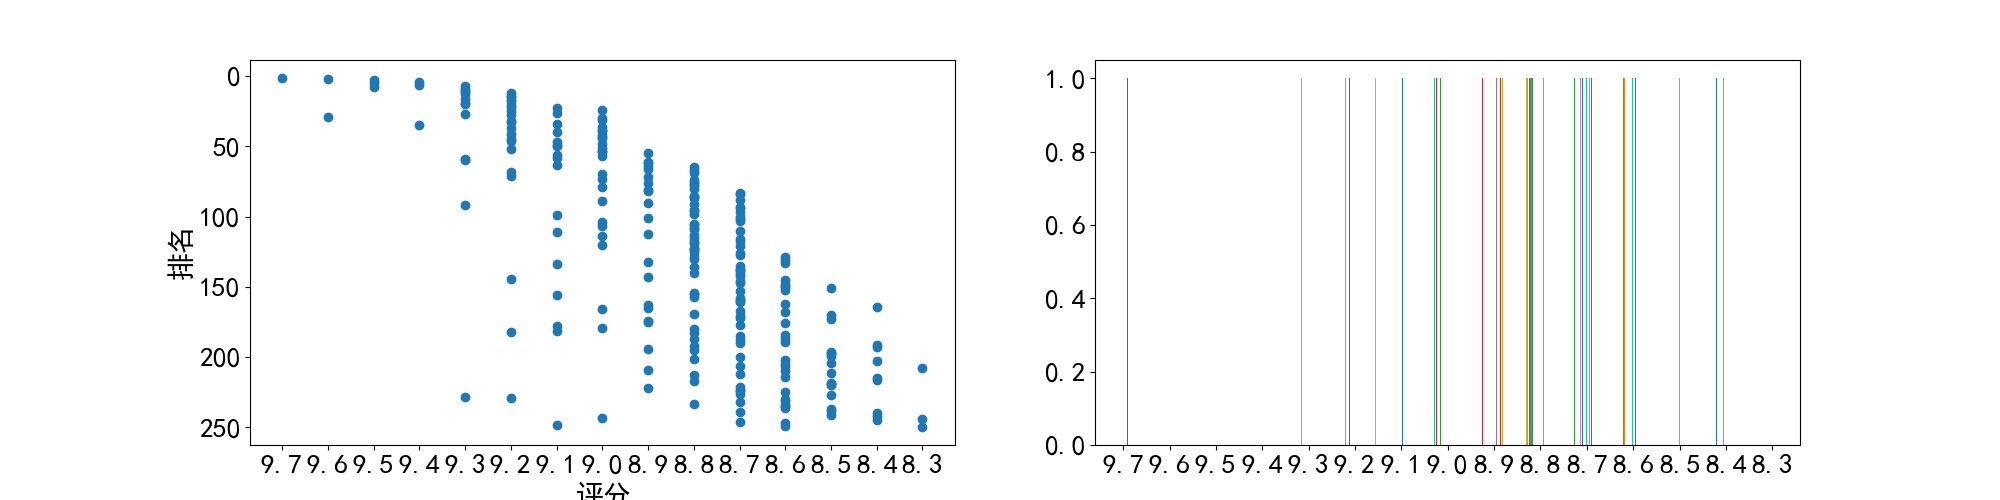

([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  arra

In [14]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
# change font to show Chinese
matplotlib.rcParams['font.family']='SimHei'
matplotlib.rcParams['font.size']=20
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(datalist['评分'],range(1,251))
plt.xlabel('评分')
plt.ylabel('排名')

# 修改y为倒叙
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.hist(datalist['评分'],bins=50)